## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## February 23, 2018: Introduction to R and statistics (part 2 of 2)

Administrivia:

- The final project will be assigned shortly. Look for a folder called `assignments/2018-03-16` for both parts.

Added in class:

- Attendance scores will be updated soon (hopefully by Monday).

Regarding Homework 6:
- For problem 1c, it should read "how would the crossover value depend (asympotically) on $M$?" (rather than "on $N$").
- For problem 4a, the values I gave are too big to handle in CoCalc. You may use these parameters instead:
```
    p = 2430985831
    E = EllipticCurve(GF(p), [0,1,0,1,-1])
    g = E(1142679369, 725589986)
```
- For problem 5c, by "one conclusion you drew from the data" I mean a statement about the "real world". (Fake example: "people born in January have bigger ears than people born in July.")

Pause here for additional questions.

### Side-by-side comparison of R and Python

In this lecture, we make a side-by-side comparison of various types of data analysis functionality in R and Python. This is inspired by [this blog post](https://www.dataquest.io/blog/python-vs-r/) from a company called Dataquest which I had not heard of until I started preparing this lecture. (Reminder: I am **still** not a statistician! Nor am I a basketball fan, but what the heck.)

In order to switch back and forth efficiently, I will work in SageMath and use the extension I described last time to switch individual cells over to R. Since we'll be using pandas, I'll turn off the Sage preparser.

In [1]:
preparser(False) # Turn off the Sage preparser
import pandas as pd

In [2]:
%load_ext rpy2.ipython

To begin, we need some data to analyze. Here, we'll use a dataset from [Open Source Sports](http://www.opensourcesports.com) consisting of historical data about men's basketball (NBA) players from (sometime in the past) until 2012. You will find this file in the same folder as this notebook. Let's start by importing this data into R and Python.

In [3]:
%%R
nba <- read.csv("basketball_players.csv")

In [4]:
nba = pd.read_csv("basketball_players.csv")

How big is this dataset?

In [5]:
%%R
dim(nba)

[1] 23751    42


In [6]:
nba.shape

(23751, 42)

Let's look at the first row to get a sense of what the data looks like.

In [9]:
%%R
head(nba, 2)

   playerID year stint tmID lgID GP GS minutes points oRebounds dRebounds
1 abramjo01 1946     1  PIT  NBA 47  0       0    527         0         0
2 aubucch01 1946     1  DTF  NBA 30  0       0     65         0         0
  rebounds assists steals blocks turnovers  PF fgAttempted fgMade ftAttempted
1        0      35      0      0         0 161         834    202         178
2        0      20      0      0         0  46          91     23          35
  ftMade threeAttempted threeMade PostGP PostGS PostMinutes PostPoints
1    123              0         0      0      0           0          0
2     19              0         0      0      0           0          0
  PostoRebounds PostdRebounds PostRebounds PostAssists PostSteals PostBlocks
1             0             0            0           0          0          0
2             0             0            0           0          0          0
  PostTurnovers PostPF PostfgAttempted PostfgMade PostftAttempted PostftMade
1             0      0 

In [10]:
nba.head(2)

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
0,abramjo01,1946,1,PIT,NBA,47,0,0,527,0,...,0,0,0,0,0,0,0,0,0,NaN
1,aubucch01,1946,1,DTF,NBA,30,0,0,65,0,...,0,0,0,0,0,0,0,0,0,NaN


Let's compute averages of the various statistics. (Not that these are particularly meaningful, but just as a demonstration.)

In [11]:
%%R
sapply(nba, mean)

          playerID               year              stint               tmID 
                NA       1982.9142352          1.0346512                 NA 
              lgID                 GP                 GS            minutes 
                NA         47.9643383          0.9356238       1097.2966612 
            points          oRebounds          dRebounds           rebounds 
       492.1306892         50.3825944        112.8252705        209.0642078 
           assists             steals             blocks          turnovers 
       107.0603764         29.3477327         18.0552398         55.3417961 
                PF        fgAttempted             fgMade        ftAttempted 
       112.8513747        410.5997642        188.5476401        135.5579976 
            ftMade     threeAttempted          threeMade             PostGP 
       101.4439813         36.4243611         12.5785020          3.1805819 
            PostGS        PostMinutes         PostPoints      PostoRebounds 

In [12]:
nba.mean()

year                  1982.914235
stint                    1.034651
GP                      47.964338
GS                       0.935624
minutes               1097.296661
points                 492.130689
oRebounds               50.382594
dRebounds              112.825271
rebounds               209.064208
assists                107.060376
steals                  29.347733
blocks                  18.055240
turnovers               55.341796
PF                     112.851375
fgAttempted            410.599764
fgMade                 188.547640
ftAttempted            135.557998
ftMade                 101.443981
threeAttempted          36.424361
threeMade               12.578502
PostGP                   3.180582
PostGS                   0.139784
PostMinutes             74.552145
PostPoints              32.665614
PostoRebounds            3.095028
PostdRebounds            7.134100
PostRebounds            14.089175
PostAssists              6.824260
PostSteals               1.768431
PostBlocks    

Let's look for correlations among columns using a scatterplot.

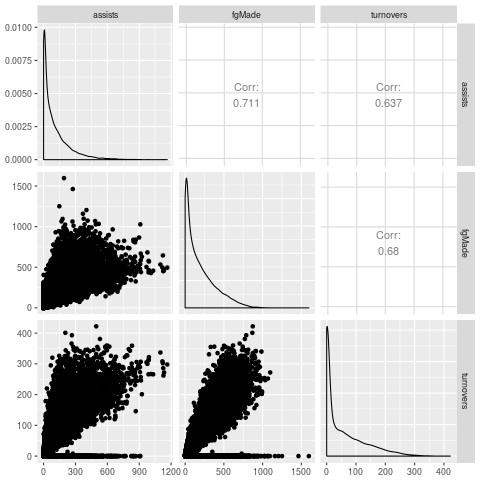

In [13]:
%%R
library(GGally)
ggpairs(nba[,c("assists", "fgMade", "turnovers")])

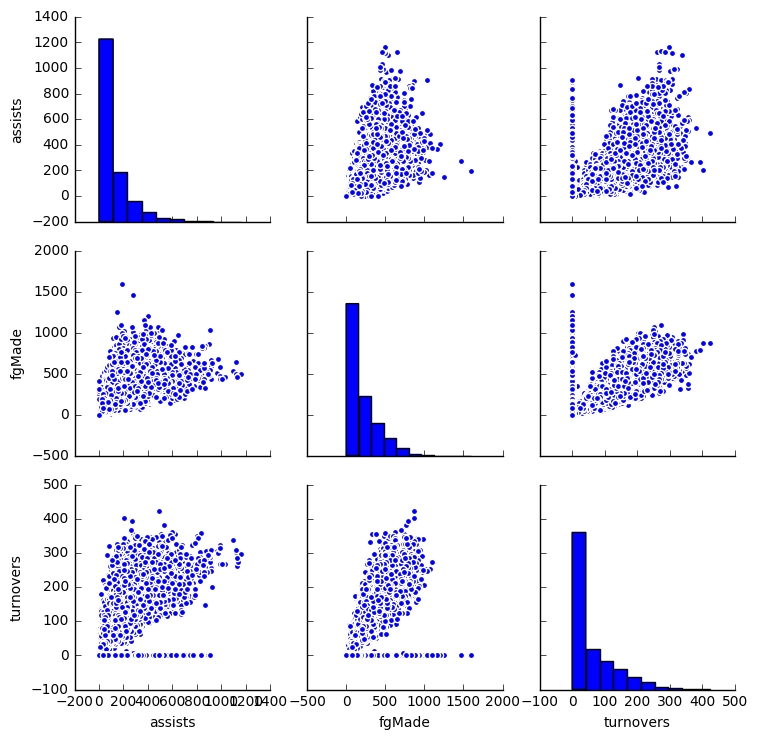

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(nba[["assists", "fgMade", "turnovers"]])
plt.show()


Note that in both of these examples, we had to reference external packages. 
- In R, [GGally](https://cran.r-project.org/web/packages/GGally/index.html) is an extension of the basic plotting library [ggplot2](http://ggplot2.org/).
- In Python, [Seaborn](http://seaborn.pydata.org/) is a visualization library based on matplotlib.

Let's do a cluster plot. To do this, we need to remove columns which do not contain numeric values.

In [15]:
%%R
library(cluster)
set.seed(1)
isGoodCol <- function(col){
   sum(is.na(col)) == 0 && is.numeric(col) 
}
goodCols <- sapply(nba, isGoodCol)
clusters <- kmeans(nba[,goodCols], centers=5)
labels <- clusters$cluster


In [16]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1)
good_columns = nba._get_numeric_data().dropna(axis=1)
kmeans_model.fit(good_columns)
labels = kmeans_model.labels_

In R, we used the cluster package. In Python, we used a module from [scikit-learn](http://scikit-learn.org/stable/index.html), a widely used package for *machine learning*. More on what that phrase means shortly.

Let's plot the clusters we just computed.

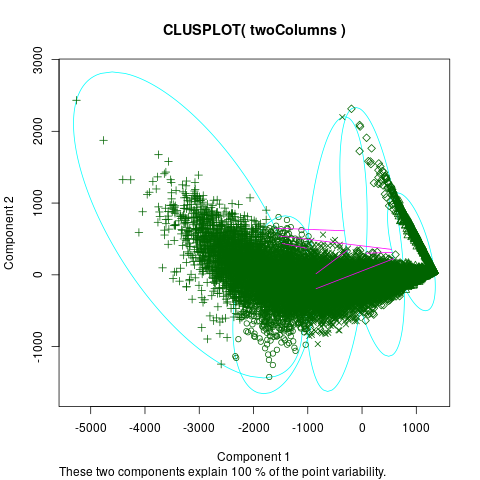

In [17]:
%%R
nba2d <- prcomp(nba[,goodCols], center=TRUE)
twoColumns <- nba2d$x[,1:2]
clusplot(twoColumns, labels)

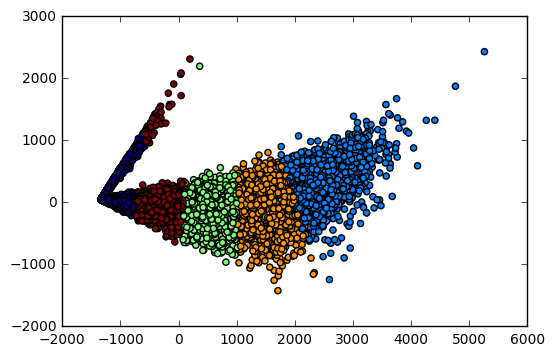

In [18]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show()

These visualizations use [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis). Roughly speaking, this means trying to express a large number of correlated variables in terms of a smaller number of uncorrelated variables. In geometric terms, imagine your data as a collection of points in a high-dimensional space, but suppose that they form a low-dimensional subspace; then points within the dataset should be describable in terms of a small number of "independent coordinates". (E.g., if you had points on a sphere, they sit in 3-space but you need only two coordinates to locate them, say latitude and longitude.)

Let's try some machine learning now. The general framework of machine learning is: one has a function from some domain to some codomain, and one would like to be able to "predict" the value at some point of the domain. Of course one can do this by a trivial lookup if one has a full value table for the function; for this to be meaningful, one instead should "train" on a small subset of the domain, then "test" elsewhere on the domain to see if the predictions hold up. It is cheating if the "training" and "testing" data overlap; this is referred to as *overfitting*.

In [20]:
%%R
trainRowCount <- floor(0.8 * nrow(nba))
set.seed(1)
trainIndex <- sample(1:nrow(nba), trainRowCount)
train <- nba[trainIndex,]
test <- nba[-trainIndex,]

In [21]:
train = nba.sample(frac=0.8, random_state=1)
test = nba.loc[~nba.index.isin(train.index)]

In this example, we took 80% of the data, sampled randomly, to be the training data and the remaining 20% to be the testing data.

Let's try doing some predictions based on linear regression. Say we want to predict assists in terms of field goals.

In [22]:
%%R
fit <- lm(assists ~ fgMade, data=train)
predictions <- predict(fit, test)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[["fgMade"]], train["assists"])
predictions = lr.predict(test[["fgMade"]])

Let's look at some summary results.

In [24]:
%%R
summary(fit)


Call:
lm(formula = assists ~ fgMade, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-492.02  -36.04  -13.54    9.87  902.68 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.53946    0.96897   12.94   <2e-16 ***
fgMade       0.50158    0.00359  139.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 95.16 on 18998 degrees of freedom
Multiple R-squared:  0.5067,	Adjusted R-squared:  0.5067 
F-statistic: 1.952e+04 on 1 and 18998 DF,  p-value: < 2.2e-16



In [25]:
import statsmodels.formula.api as sm
model = sm.ols(formula='assists ~ fgMade', data=train)
fitted = model.fit()
fitted.summary()

/ext/sage/sage-8.1/local/lib/python2.7/site-packages/patsy/util.py:652: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  return safe_is_pandas_categorical_dtype(data.dtype)
/ext/sage/sage-8.1/local/lib/python2.7/site-packages/patsy/util.py:679: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  if safe_is_pandas_categorical_dtype(dt1):


OLS Regression Results 
 
 Dep. Variable: assists R-squared: 0.506 
 
 
 Model: OLS Adj. R-squared: 0.506 
 
 
 Method: Least Squares F-statistic: 1.948e+04 
 
 
 Date: Fri, 23 Feb 2018 Prob (F-statistic): 0.00 
 
 
 Time: 22:42:58 Log-Likelihood: -1.1344e+05 
 
 
 No. Observations: 19001 AIC: 2.269e+05 
 
 
 Df Residuals: 18999 BIC: 2.269e+05 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 Intercept 12.8753 0.961 13.400 0.000 10.992 14.759 
 
 
 fgMade 0.4989 0.004 139.556 0.000 0.492 0.506 
 
 
 
 
 Omnibus: 10185.359 Durbin-Watson: 2.020 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 112607.349 
 
 
 Skew: 2.355 Prob(JB): 0.00 
 
 
 Kurtosis: 13.957 Cond. No. 376.

We'll take a closer look at machine learning in a later lecture.

### The takeaway

Some differences between R and Python from the point of view of statistics:
- R uses a functional approach, where everything you want to do is a named function that you can call. Python uses an object-oriented approarch, where most things you want to do are methods of particular types of objects to which they apply.
- R includes a lot of basic functionality for statistics by default, whereas Python does not; this functionality has to be loaded from packages.
- R has a large ecosystem of small packages, including many specialized tasks. Python has a smaller ecosystem of larger packages, which include most standard functionality but miss some specialized things.
- A lot of functionality on both sides was modeled on the other. For instance, pandas DataFrames are quite conciously modeled on the R counterparts.
- For "pure statistics", the R code is generally simpler than the Python code. For "general computing", Python tends to be easier. For instance, if you wanted to scrape data off a web page and then do some analysis, that scraping step is much easier in Python because the ecosystem (being the product of many people who are not all statisticians) includes very good packages for manipulating HTML files.

Particularly for this last reason, I will focus more on the Python scientific stack than R in the remainder of this course. However, if you are familiar with scientific computing in Python, you should be able to get up to speed with R fairly quickly. (Most of the statistics courses taught at UCSD use R in some form or another.)